# pip & import

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 12.2

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install catboost

In [ ]:
!pip install workalendar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732015 sha256=365761ddb70590a86b61ff92dae3d8ac18125ed02b5808efb57d882156469e65
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import random
import os
import warnings
import easydict
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

# data

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/dev/ML_basic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dev/ML_basic/test.csv')
'''
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
it_df = pd.read_csv('international_trade.csv')

In [ ]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [ ]:
it_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


it_df['품목명'] == '감귤', it_df['품목명'] == '당근', it_df['품목명'] == '양배추'  
감귤 = TG, 당근 = CR, 양배추 = CB  
무, 브로콜리는 목록에 없음

감귤, 당근, 양배추 총 생산량 + 수입 중량 으로 연관성 생각할 수 있음

In [ ]:
cc_df = it_df[(it_df['품목명'] == '감귤')| (it_df['품목명'] == '당근')| (it_df['품목명'] == '양배추') ]
cc_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
17,2019-01,감귤,58368,172,0,0,172
30,2019-02,양배추,182636,69,336142,77,-8
33,2019-02,당근,16250,16,6524716,2600,-2585
...,...,...,...,...,...,...,...
1226,2023-01,당근,16010,13,6754130,2333,-2321
1236,2023-01,감귤,81509,269,0,0,269
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737


In [ ]:
# train_df = train_df[train_df['price(원/kg)'] != 0]

In [ ]:
test_df

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


# 함수 정의

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
# 일요일 column 추가
def sunday(day):
    out=0
    if day ==6:
        out=1
    return out

In [ ]:
def classify_item(x):
    item=None
    #x=str(x)
    if 'TG' in x:
        item='TG'
    elif 'BC' in x:
        item='BC'
    elif 'CR' in x:
        item='CR'
    elif 'CB' in x:
        item='CB'
    elif 'RD' in x:
        item='RD'
    return item

In [1]:
def change_answer(df):
    df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))
    df['sunday'] = (df['timestamp'].dt.dayofweek == 6).astype(int)
    df.loc[df['sunday'] == 1, 'answer'] = 0
    df.drop(columns=['timestamp', 'sunday'],inplace=True)
    return df

# 시계열 특성 사용

In [ ]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train_df['year'] = train_df['timestamp'].apply(lambda x : int(x[0:4]))
train_df['month'] = train_df['timestamp'].apply(lambda x : int(x[5:7]))
train_df['day'] = train_df['timestamp'].apply(lambda x : int(x[8:10]))

test_df['year'] = test_df['timestamp'].apply(lambda x : int(x[0:4]))
test_df['month'] = test_df['timestamp'].apply(lambda x : int(x[5:7]))
test_df['day'] = test_df['timestamp'].apply(lambda x : int(x[8:10]))

In [ ]:
train_df['날짜'] = pd.to_datetime(train_df['timestamp'])
train_df['요일'] = train_df['날짜'].dt.dayofweek

train_df['sunday']= train_df.apply(lambda x : sunday(x['요일']),axis=1)

test_df['날짜'] = pd.to_datetime(test_df['timestamp'])
test_df['요일'] = test_df['날짜'].dt.dayofweek

test_df['sunday']= test_df.apply(lambda x : sunday(x['요일']),axis=1)


train_df.drop(columns=['날짜', '요일'],inplace=True)
test_df.drop(columns=['날짜', '요일'],inplace=True)

train_df.tail(10)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,sunday
59387,RD_F_J_20230222,2023-02-22,RD,F,J,512400.0,440.0,2023,2,22,0
59388,RD_F_J_20230223,2023-02-23,RD,F,J,478360.0,396.0,2023,2,23,0
59389,RD_F_J_20230224,2023-02-24,RD,F,J,466440.0,388.0,2023,2,24,0
59390,RD_F_J_20230225,2023-02-25,RD,F,J,250580.0,429.0,2023,2,25,0
59391,RD_F_J_20230226,2023-02-26,RD,F,J,0.0,0.0,2023,2,26,1
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,0
59396,RD_F_J_20230303,2023-03-03,RD,F,J,427520.0,529.0,2023,3,3,0


In [ ]:
# 공휴일 column 추가
import pandas as pd
from datetime import datetime
from workalendar.asia import SouthKorea

# SouthKorea 객체 생성
cal = SouthKorea()

# 시작과 끝 날짜 설정
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 3, 3)

# 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='D')


# 한국의 공휴일 데이터프레임 생성 (대체 공휴일 포함)
korean_holidays = pd.DataFrame(date_range, columns=['Date'])
korean_holidays['Holiday'] = korean_holidays['Date'].apply(lambda x: cal.is_holiday(x))
#korean_holidays['workingday'] = korean_holidays['Date'].apply(lambda x: cal.is_working_day(x))
# korean_holidays = korean_holidays[korean_holidays['Holiday'] == True]

korean_holidays=korean_holidays.rename(columns={'Date':'timestamp'})

# 결과 출력
korean_holidays

,timestamp,Holiday
0,2019-01-01,True
1,2019-01-02,False
2,2019-01-03,False
3,2019-01-04,False
4,2019-01-05,False
...,...,...
1518,2023-02-27,False
1519,2023-02-28,False
1520,2023-03-01,True
1521,2023-03-02,False


In [ ]:
# 형변환 하는데 나중에 문제 생긴다면 수정하자
# bool type을 int형으로 변환
korean_holidays['Holiday']=korean_holidays['Holiday'].astype(int)

# merge할 두 df의 type을 맞춰 주기위함이다. korean은 datetime, train은 object의 형태였다.
korean_holidays['timestamp']=korean_holidays['timestamp'].astype(str)
train_df['timestamp']=train_df['timestamp'].astype(str)
test_df['timestamp']=test_df['timestamp'].astype(str)

In [ ]:
# 날짜가 같으면 합쳐짐 열만 하나 추가 row는 변화없음
train_df=pd.merge(train_df,korean_holidays, on='timestamp', how='left')
test_df=pd.merge(test_df,korean_holidays, on='timestamp', how='left')

# 과일 종류별로 데이터 분리

In [ ]:
train_df['item']=train_df.apply(lambda x: classify_item(x['ID']),axis=1)
test_df['item']=test_df.apply(lambda x: classify_item(x['ID']),axis=1)

In [ ]:
train_df.loc[train_df['item']=='TG'].tail(60)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,sunday,Holiday
15170,TG_E_S_20230103,2023-01-03,TG,E,S,59219.8,2077.0,2023,1,3,0,0
15171,TG_E_S_20230104,2023-01-04,TG,E,S,52822.0,1897.0,2023,1,4,0,0
15172,TG_E_S_20230105,2023-01-05,TG,E,S,28964.0,1990.0,2023,1,5,0,0
15173,TG_E_S_20230106,2023-01-06,TG,E,S,31985.0,1969.0,2023,1,6,0,0
15174,TG_E_S_20230107,2023-01-07,TG,E,S,41328.2,2030.0,2023,1,7,0,0
15175,TG_E_S_20230108,2023-01-08,TG,E,S,0.0,0.0,2023,1,8,1,0
15176,TG_E_S_20230109,2023-01-09,TG,E,S,37034.2,2729.0,2023,1,9,0,0
15177,TG_E_S_20230110,2023-01-10,TG,E,S,23664.0,3098.0,2023,1,10,0,0
15178,TG_E_S_20230111,2023-01-11,TG,E,S,57848.2,2605.0,2023,1,11,0,0
15179,TG_E_S_20230112,2023-01-12,TG,E,S,52451.2,2431.0,2023,1,12,0,0


# EDA

In [ ]:
td = train_df.copy()
cd = cc_df.copy()

In [ ]:
td = td.drop(columns = 'ID')
td['총 판매 금액'] = td['supply(kg)'] * td['price(원/kg)']
grouped_data = td.groupby(['timestamp', 'item', 'corporation', 'location'])
td['생산 중량'] = grouped_data['supply(kg)'].transform('sum')

In [ ]:
# timestamp를 'yyyy-mm' 형식으로 변경
td['timestamp'] = pd.to_datetime(td['timestamp']).dt.to_period('M')

# 그룹화
grouped_data = td.groupby(['timestamp', 'item', 'corporation', 'location'])

# 총 중량, 총 팬매 금액 총합
td['생산 중량'] = grouped_data['supply(kg)'].transform('sum')
td['총 판매 금액'] = grouped_data['총 판매 금액'].transform('sum')

# 중복된 행을 제거 (중복으로 계산된 값이 있을 수 있음)
td = td.drop_duplicates(subset=['timestamp', 'item', 'corporation', 'location'])
# 월 평균 금액 생성
td['평균 금액'] = td['총 판매 금액'] / td['생산 중량']

# 필요 없는 열 제거
td = td.drop(columns=['supply(kg)', 'price(원/kg)', '총 판매 금액'])
td

,timestamp,item,corporation,location,생산 중량,평균 금액
0,2019-01,TG,A,J,715148.0,1794.391154
31,2019-02,TG,A,J,144829.0,2354.371086
59,2019-03,TG,A,J,57136.0,3883.404246
90,2019-04,TG,A,J,6667.0,4107.026249
120,2019-05,TG,A,J,7094.0,5395.069918
...,...,...,...,...,...,...
59274,2022-11,RD,F,J,243080.0,555.555044
59304,2022-12,RD,F,J,7279980.0,537.844953
59335,2023-01,RD,F,J,9382720.0,471.908705
59366,2023-02,RD,F,J,10723040.0,505.247064


In [ ]:
# '품목명' 열 값 변경
cd['품목명'] = cd['품목명'].replace({'양배추': 'CB', '당근': 'CR', '감귤': 'TG'})

# 열의 이름 변경
cd = cd.rename(columns={'품목명': 'item'})
cd = cd.rename(columns={'기간': 'item'})
cd

,기간,item,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
5,2019-01,CB,184650,94,395802,90,4
8,2019-01,CR,23150,22,7466150,2955,-2934
17,2019-01,TG,58368,172,0,0,172
30,2019-02,CB,182636,69,336142,77,-8
33,2019-02,CR,16250,16,6524716,2600,-2585
...,...,...,...,...,...,...,...
1226,2023-01,CR,16010,13,6754130,2333,-2321
1236,2023-01,TG,81509,269,0,0,269
1250,2023-02,CB,13188,13,377456,104,-91
1253,2023-02,CR,22510,20,9260020,3758,-3737


In [ ]:
train_df['corporation'].value_counts()

A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: corporation, dtype: int64

In [ ]:
# 기업별 0의 갯수
print(train_df.loc[train_df['corporation']=='A'].loc[train_df['supply(kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='E'].loc[train_df['supply(kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='D'].loc[train_df['supply(kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='C'].loc[train_df['supply(kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='B'].loc[train_df['supply(kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='F'].loc[train_df['supply(kg)']==0].shape)

(7897, 12)
(8508, 12)
(7263, 12)
(5743, 12)
(4383, 12)
(1658, 12)


In [ ]:
train_df['corporation'].value_counts()

A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: corporation, dtype: int64

In [ ]:
# 기업별 0의 갯수
print(train_df.loc[train_df['corporation']=='A'].loc[train_df['price(원/kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='E'].loc[train_df['price(원/kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='D'].loc[train_df['price(원/kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='C'].loc[train_df['price(원/kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='B'].loc[train_df['price(원/kg)']==0].shape)
print(train_df.loc[train_df['corporation']=='F'].loc[train_df['price(원/kg)']==0].shape)

(7898, 12)
(8509, 12)
(7264, 12)
(5743, 12)
(4383, 12)
(1658, 12)


In [ ]:
train_df['location'].value_counts()

J    35029
S    24368
Name: location, dtype: int64

In [ ]:
# 지역별 0의 갯수
print(train_df.loc[train_df['location']=='J'].loc[train_df['supply(kg)']==0].shape)
print(train_df.loc[train_df['location']=='S'].loc[train_df['supply(kg)']==0].shape)

(20099, 12)
(15353, 12)


In [ ]:
# price = 0 인데, supply != 0 인경우 3개가 존재
train_df.loc[train_df['corporation']=='A'].loc[(train_df['price(원/kg)']==0) & (train_df['supply(kg)']!=0)]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,sunday,Holiday
825,TG_A_J_20210405,2021-04-05,TG,A,J,64.0,0.0,2021,4,5,0,0


In [ ]:
train_df.loc[train_df['corporation']=='E'].loc[(train_df['price(원/kg)']==0) & (train_df['supply(kg)']!=0)]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,sunday,Holiday
31199,CB_E_J_20210109,2021-01-09,CB,E,J,80.0,0.0,2021,1,9,0,0


In [ ]:
train_df.loc[train_df['corporation']=='D'].loc[(train_df['price(원/kg)']==0) & (train_df['supply(kg)']!=0)]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,sunday,Holiday
9266,TG_D_J_20190509,2019-05-09,TG,D,J,129.0,0.0,2019,5,9,0,0


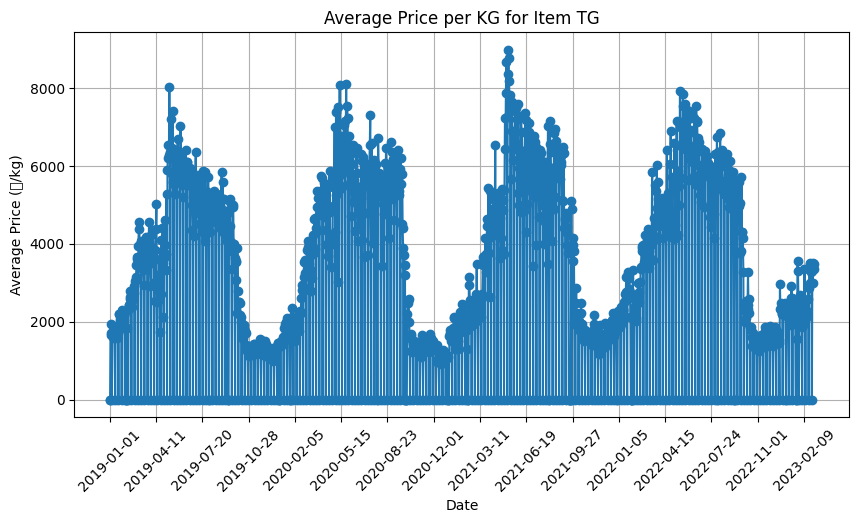

In [ ]:
tg_data = train_df[train_df['item'] == 'TG']
result = tg_data.groupby('timestamp')['price(원/kg)'].mean()

# 날짜별 'price(원/kg)'의 평균
result = tg_data.groupby('timestamp')['price(원/kg)'].mean()

# 그래프 생성
plt.figure(figsize=(10, 5))

# 선 그래프 그리기
plt.plot(result.index, result.values, marker='o', linestyle='-')

# 그래프 제목과 라벨 설정
plt.title('Average Price per KG for Item TG')
plt.xlabel('Date')
plt.ylabel('Average Price (원/kg)')

# x축 눈금 라벨 설정 (너무 많으면 겹칠 수 있으므로 조절 필요)
plt.xticks(result.index[::100], rotation=45)

# 그리드 표시
plt.grid(True)

# 그래프 출력
plt.show()

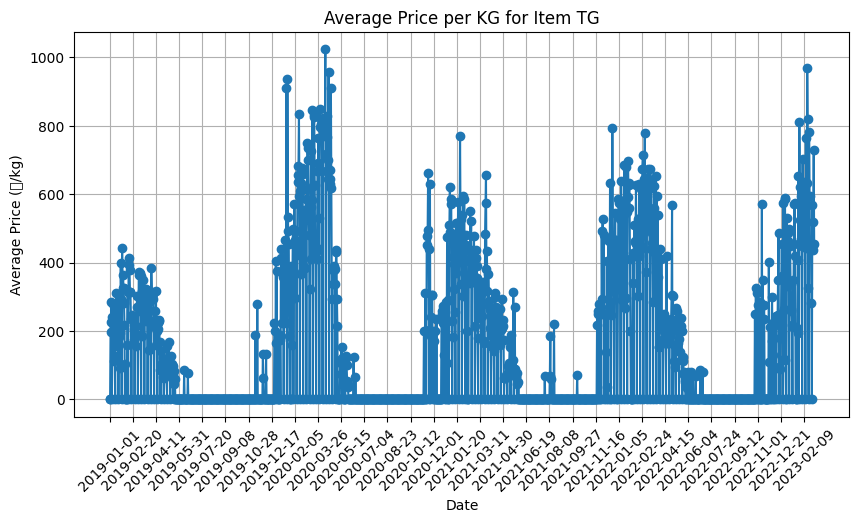

In [ ]:
cb_data = train_df[train_df['item'] == 'CB']
result = cb_data.groupby('timestamp')['price(원/kg)'].mean()

# 날짜별 'price(원/kg)'의 평균
result_cb = cb_data.groupby('timestamp')['price(원/kg)'].mean()

# 그래프 생성
plt.figure(figsize=(10, 5))

# 선 그래프 그리기
plt.plot(result.index, result.values, marker='o', linestyle='-')

# 그래프 제목과 라벨 설정
plt.title('Average Price per KG for Item TG')
plt.xlabel('Date')
plt.ylabel('Average Price (원/kg)')

# x축 눈금 라벨 설정 (너무 많으면 겹칠 수 있으므로 조절 필요)
plt.xticks(result_cb.index[::50], rotation=45)

# 그리드 표시
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
td

,timestamp,item,corporation,location,생산 중량,평균 금액
0,2019-01,TG,A,J,715148.0,1794.391154
31,2019-02,TG,A,J,144829.0,2354.371086
59,2019-03,TG,A,J,57136.0,3883.404246
90,2019-04,TG,A,J,6667.0,4107.026249
120,2019-05,TG,A,J,7094.0,5395.069918
...,...,...,...,...,...,...
59274,2022-11,RD,F,J,243080.0,555.555044
59304,2022-12,RD,F,J,7279980.0,537.844953
59335,2023-01,RD,F,J,9382720.0,471.908705
59366,2023-02,RD,F,J,10723040.0,505.247064


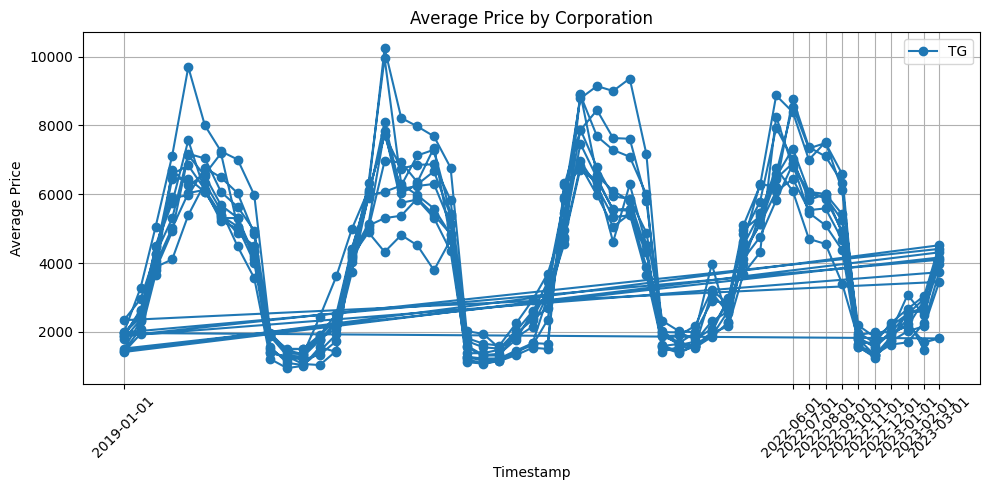

In [ ]:
# 각 corporation 별로 데이터를 분리
tg_data = td[td['item'] == 'TG']
a_data = td[td['corporation'] == 'A']
j_data = td[td['location'] == 'J']

# 'timestamp' 컬럼을 문자열로 변환 후 datetime 형식으로 변환
tg_data['timestamp'] = pd.to_datetime(tg_data['timestamp'].astype(str))
a_data['timestamp'] = pd.to_datetime(a_data['timestamp'].astype(str))
j_data['timestamp'] = pd.to_datetime(j_data['timestamp'].astype(str))

# 그래프 생성
plt.figure(figsize=(10, 5))

# 각 corporation 별로 평균 금액을 그래프에 추가
plt.plot(tg_data['timestamp'], tg_data['평균 금액'], label='TG', marker='o')


# 그래프 제목과 라벨 설정
plt.title('Average Price by Corporation')
plt.xlabel('Timestamp')
plt.ylabel('Average Price')

# x축 눈금 라벨 설정 (너무 많으면 겹칠 수 있으므로 조절 필요)
plt.xticks(tg_data['timestamp'][::50], rotation=45)

# 범례 추가
plt.legend()

# 그리드 표시
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

# 학습에 사용할 변수 정의

In [ ]:
# 학습에 사용하지 않을 변수들을 제거
train_X = train_df.drop(columns=['ID', 'timestamp', 'supply(kg)', 'price(원/kg)'])
train_Y = train_df[['price(원/kg)']]

test_X = test_df.drop(columns=['ID', 'timestamp'])

test에는 supply(kg)이 없음

# 수치형 스케일링

In [ ]:
list(train_X.columns)

['item',
 'corporation',
 'location',
 'year',
 'month',
 'day',
 'sunday',
 'Holiday']

In [ ]:
list(test_X.columns)

['item',
 'corporation',
 'location',
 'year',
 'month',
 'day',
 'sunday',
 'Holiday']

In [ ]:
no_category_cols = []
category_cols = list(train_X.columns)

train_no_category = train_X[no_category_cols]
train_category = train_X[category_cols]

train_no_category.shape, train_category.shape

((59397, 0), (59397, 8))

In [ ]:
no_category_cols = []
category_cols = list(test_X.columns)

test_no_category = test_X[no_category_cols]
test_category = test_X[category_cols]

test_no_category.shape, test_category.shape

((1092, 0), (1092, 8))

In [ ]:
'''# 스케일링 적용할 컬럼 선언
scaling_cols = ['supply(kg)']

# 수치형 데이터 프레임에서 스케일링 적용할 컬럼이 포함된 데이터 프레임 생성
train_scaling = train_no_category[scaling_cols]
#test_scaling = test_no_category[scaling_cols]

print(f'{train_scaling.shape}')# / {test_scaling.shape}')
train_scaling.head(3)'''

"# 스케일링 적용할 컬럼 선언\nscaling_cols = ['supply(kg)']\n\n# 수치형 데이터 프레임에서 스케일링 적용할 컬럼이 포함된 데이터 프레임 생성\ntrain_scaling = train_no_category[scaling_cols]\n#test_scaling = test_no_category[scaling_cols]\n\nprint(f'{train_scaling.shape}')# / {test_scaling.shape}')\ntrain_scaling.head(3)"

In [ ]:
'''from sklearn.preprocessing import StandardScaler'''

'from sklearn.preprocessing import StandardScaler'

In [ ]:
'''# 인스턴스 생성
std = StandardScaler()'''

'# 인스턴스 생성\nstd = StandardScaler()'

In [ ]:
'''std.fit(train_scaling)'''

'std.fit(train_scaling)'

In [ ]:
'''# 반영
X_train_scaled = std.transform(train_scaling)
X_test_scaled = std.transform(test_scaling)'''

'# 반영\nX_train_scaled = std.transform(train_scaling)\nX_test_scaled = std.transform(test_scaling)'

In [ ]:
'''X_train_scaled.shape, X_test_scaled.shape'''

'X_train_scaled.shape, X_test_scaled.shape'

In [ ]:
'''train_scaling.shape, test_scaling.shape'''

'train_scaling.shape, test_scaling.shape'

# 수치형, 범주형 합치기

In [ ]:
_train_encoded = pd.DataFrame()
_test_encoded = pd.DataFrame()

for col in category_cols:
  _encoder = ce.OneHotEncoder(use_cat_names=True)
  _encoder.fit(train_category[col])
  _encoded = _encoder.transform(train_category[col])
  _train_encoded = pd.concat([_train_encoded, _encoded], axis=1)

  _encoded = _encoder.transform(test_category[col])
  _test_encoded = pd.concat([_test_encoded, _encoded], axis=1)

In [ ]:
train_encoded = pd.concat([train_no_category, _train_encoded], axis=1)
train_encoded.shape

(59397, 18)

In [ ]:
train_encoded

,item_TG,item_CR,item_CB,item_RD,item_BC,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S,year,month,day,sunday,Holiday
0,1,0,0,0,0,1,0,0,0,0,0,1,0,2019,1,1,0,1
1,1,0,0,0,0,1,0,0,0,0,0,1,0,2019,1,2,0,0
2,1,0,0,0,0,1,0,0,0,0,0,1,0,2019,1,3,0,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,2019,1,4,0,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,2019,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,0,0,0,1,0,0,0,0,0,0,1,1,0,2023,2,27,0,0
59393,0,0,0,1,0,0,0,0,0,0,1,1,0,2023,2,28,0,0
59394,0,0,0,1,0,0,0,0,0,0,1,1,0,2023,3,1,0,1
59395,0,0,0,1,0,0,0,0,0,0,1,1,0,2023,3,2,0,0


In [ ]:
test_encoded = pd.concat([test_no_category, _test_encoded], axis=1)
test_encoded.shape

(1092, 18)

In [ ]:
train_target = train_Y
train_features = train_encoded

train_features.shape, train_target.shape

((59397, 18), (59397, 1))

# K-Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 교차 검증
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)

## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import mean_squared_error

model = DecisionTreeClassifier(random_state=42)

n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # 학습
    model.fit(train_x, train_y)

    valid_pred = model.predict(valid_x)  # 예측값
    print(valid_pred)

    # 평가
    rmse = mean_squared_error(valid_y, valid_pred, squared=False)
    rmse_lst.append(rmse)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

[1043. 1470.    0. ...    0.  531.  472.]
1 번째 Stratified Stratified K-Fold RMSE: 1181.485554184847
[1692. 1456. 1374. ...  590.  590.  482.]
2 번째 Stratified Stratified K-Fold RMSE: 1080.7963930511255
[   0. 1408.    0. ...  440.  482.  523.]
3 번째 Stratified Stratified K-Fold RMSE: 1102.6676053456852
[   0. 1272. 1546. ...  411.  352.    0.]
4 번째 Stratified Stratified K-Fold RMSE: 1130.3803272396979
[   0. 1326. 1433. ...  533.    0.  627.]
5 번째 Stratified Stratified K-Fold RMSE: 1163.9138579960443
[1428. 1428.    0. ...  537.  537.  671.]
6 번째 Stratified Stratified K-Fold RMSE: 1163.7829350315694
--------------------------------------------------
교차 검증 RMSE: 1137.1711121414949


## XGBoost

### model 1

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
hp = {
    "random_state" : 42
}

model = XGBRegressor(**hp)
n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 880.9436464584375
2 번째 Stratified K-Fold RMSE: 884.2724352919051
3 번째 Stratified K-Fold RMSE: 863.5647644624737
4 번째 Stratified K-Fold RMSE: 916.0183814542698
5 번째 Stratified K-Fold RMSE: 884.602167713641
--------------------------------------------------
교차 검증 RMSE: 885.8802790761454


### model 2

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
model = XGBRegressor(**hp)

In [ ]:
n_iter=15 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(800,1200,20, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

-863.8998842095737

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 968, 'max_depth': 10, 'learning_rate': 0.01}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

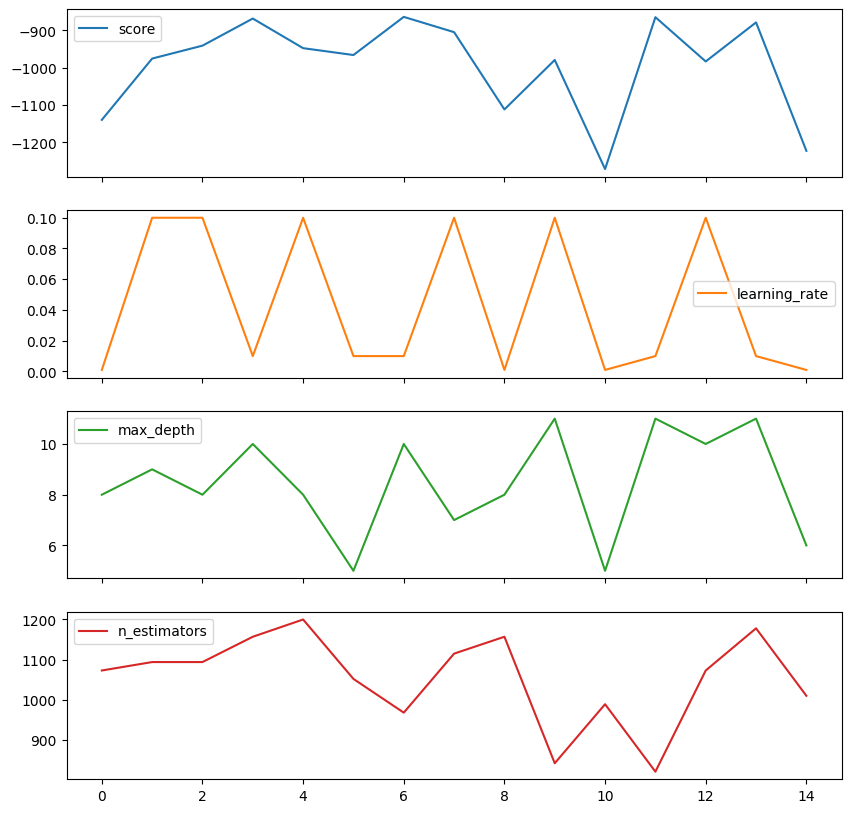

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)

In [ ]:
best_params['random_state'] = 42
best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
best_mode = XGBRegressor(**hp)

In [ ]:
seed_everything(42)
n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 890.8099798959263
2 번째 Stratified K-Fold RMSE: 882.47458898719
3 번째 Stratified K-Fold RMSE: 847.5484429063554
4 번째 Stratified K-Fold RMSE: 876.9214542213845
5 번째 Stratified K-Fold RMSE: 908.8509682611185
6 번째 Stratified K-Fold RMSE: 906.1490792873766
--------------------------------------------------
교차 검증 RMSE: 885.4590855932252


In [ ]:
valid_pred

array([1320.5869 , 1462.7855 ,  333.5296 , ...,  403.036  ,  449.2041 ,
        456.09192], dtype=float32)

## Light GBM

### model 0

In [ ]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_squared_error

In [ ]:
seed_everything(42)
hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose' : -1
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []
rmse_lst = []
for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  tr_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  tr_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(tr_x, tr_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 910.1557697535283
2 번째 Stratified K-Fold RMSE: 916.4285719869631
3 번째 Stratified K-Fold RMSE: 900.0390527674294
4 번째 Stratified K-Fold RMSE: 942.020666896565
5 번째 Stratified K-Fold RMSE: 916.2881719185165
--------------------------------------------------
교차 검증 RMSE: 916.9864466646004


In [ ]:
model = LGBMRegressor(**hp)
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(2,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(1000,2000,20, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -0.8, 20)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=3)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features, train_target)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


-901.7902492182205

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 1789, 'max_depth': 10, 'learning_rate': 0.004951500669473132}

In [ ]:
best_params.keys

<function dict.keys>

In [ ]:
hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    #'learning_rate': 0.05,
    'verbose' : -1,
    'n_estimators': 1473, 'max_depth': 7, 'learning_rate': 0.032008340465997674
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  tr_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  tr_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(tr_x, tr_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 872.1805100371527
2 번째 Stratified K-Fold RMSE: 876.4166354210125
3 번째 Stratified K-Fold RMSE: 848.9586344659505
4 번째 Stratified K-Fold RMSE: 902.7176581977999
5 번째 Stratified K-Fold RMSE: 870.3605197554622
--------------------------------------------------
교차 검증 RMSE: 874.1267915754755


### model 1

In [ ]:
hp = {
    "random_state" : 42,
    'verbose' : -1
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 886.6656187705381
2 번째 Stratified K-Fold RMSE: 893.1306509510232
3 번째 Stratified K-Fold RMSE: 876.0323084019057
4 번째 Stratified K-Fold RMSE: 920.2307154379848
5 번째 Stratified K-Fold RMSE: 891.3274631694748
--------------------------------------------------
교차 검증 RMSE: 883.8020714608303


### model 2

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": -1, # 로그
}
model = LGBMRegressor(**hp)

In [ ]:
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(800,1200,100, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

-868.8836405594641

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 1078, 'max_depth': 10, 'learning_rate': 0.1}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

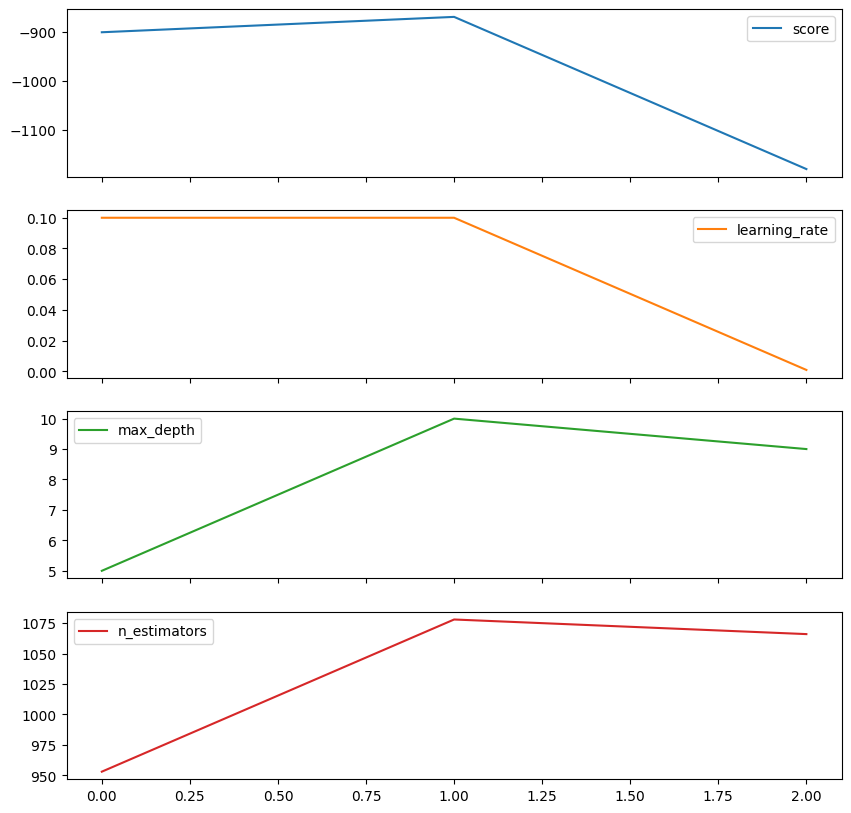

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
best_params['random_state'] = 42
best_params['verbose'] = -1

# best 모델 인스턴스 생성(정의)
best_mode = LGBMRegressor(**best_params)

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 886.6656187705381
2 번째 Stratified K-Fold RMSE: 893.1306509510232
3 번째 Stratified K-Fold RMSE: 876.0323084019057
4 번째 Stratified K-Fold RMSE: 920.2307154379848
5 번째 Stratified K-Fold RMSE: 891.3274631694748
--------------------------------------------------
교차 검증 RMSE: 887.0271647559487


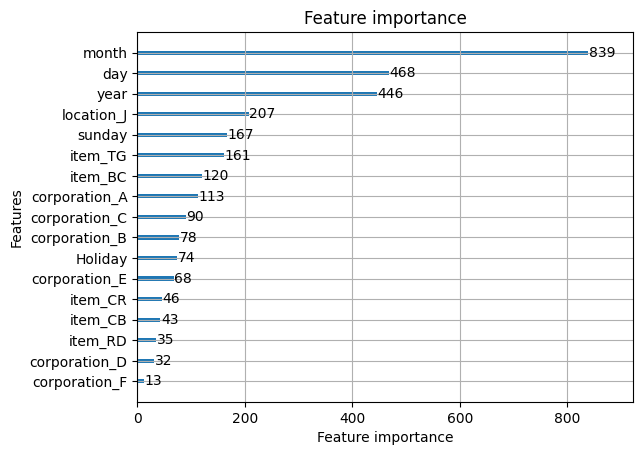

In [ ]:
plot_importance(model)
plt.show()

## catboost

### model 1

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
hp = {
    "random_state" : 42,
    "verbose" : 0 # 부스팅 단계 출력 안보이게 하기
}
model = CatBoostRegressor(**hp)
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 894.5608594024397
2 번째 Stratified K-Fold RMSE: 892.1320472056892
3 번째 Stratified K-Fold RMSE: 870.1809058874879
4 번째 Stratified K-Fold RMSE: 917.8180435358836
5 번째 Stratified K-Fold RMSE: 889.5252226111062
--------------------------------------------------
교차 검증 RMSE: 888.481227499092


### model 2

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
model = CatBoostRegressor(**hp)

In [ ]:
n_iter=5 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(10,500,20, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

-860.0267254262859

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 319, 'max_depth': 11, 'learning_rate': 0.1}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

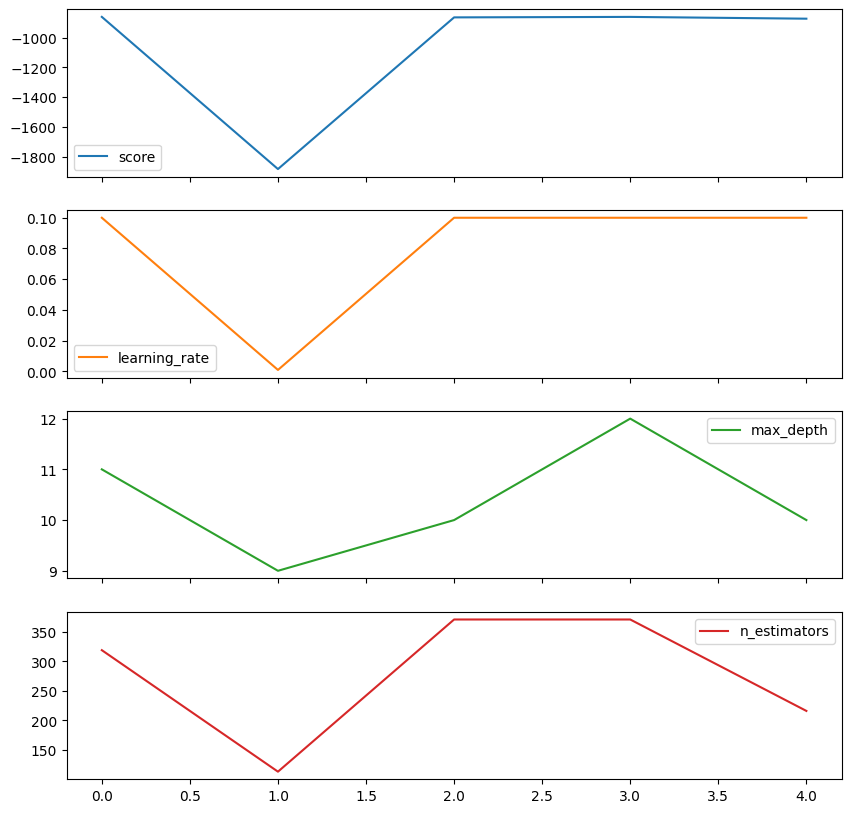

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
best_params['random_state'] = 42
best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
best_mode = CatBoostRegressor(**best_params)

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 894.5608594024397
2 번째 Stratified K-Fold RMSE: 892.1320472056892
3 번째 Stratified K-Fold RMSE: 870.1809058874879
4 번째 Stratified K-Fold RMSE: 917.8180435358836
5 번째 Stratified K-Fold RMSE: 889.5252226111062
--------------------------------------------------
교차 검증 RMSE: 889.3536651449778


Text(0.5, 1.0, 'Feature Importance')

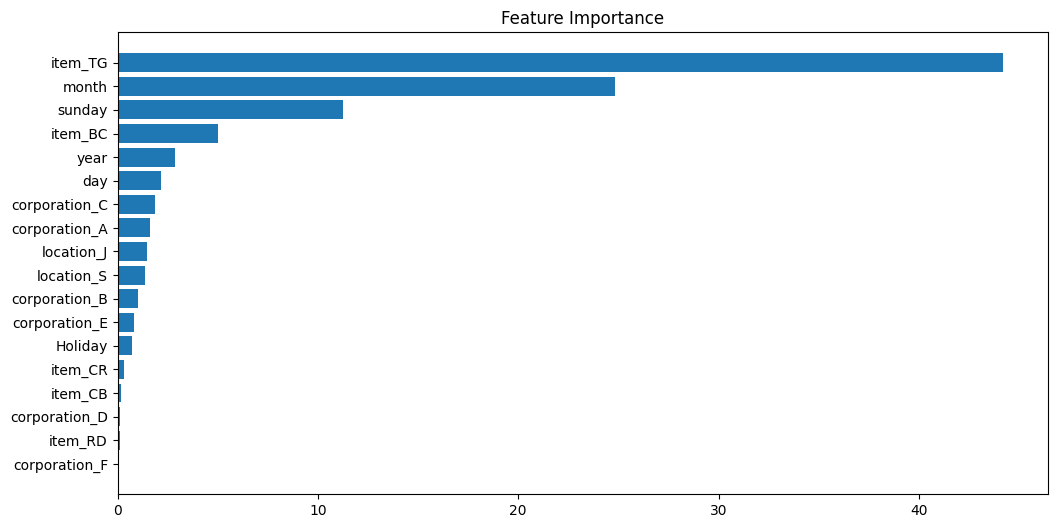

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(range(len(train_x)))[sorted_idx])
# 변수명이 있다면, 아래와 같이...
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance')

## 랜덤포레스트

### model 1

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
hp = {
    "random_state": 42,
    "verbose": 0  # 부스팅 단계 출력 안보이게 하기
}
model = RandomForestRegressor(**hp)  # RandomForestRegressor로 모델 변경
n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # 학습
    model.fit(train_x, train_y)
    valid_pred = model.predict(valid_x)  # 예측값

    # 평가
    rmse = mean_squared_error(valid_y, valid_pred, squared=False)
    rmse_lst.append(rmse)
    print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-' * 50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 892.6291758076986
2 번째 Stratified K-Fold RMSE: 863.6937000738636
3 번째 Stratified K-Fold RMSE: 852.7673030397949
4 번째 Stratified K-Fold RMSE: 917.6659767691796
5 번째 Stratified K-Fold RMSE: 867.3474581427878
--------------------------------------------------
교차 검증 RMSE: 878.820722766665


### model 2

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
model = RandomForestRegressor(**hp)

In [ ]:
n_iter=5 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(10,500,30, dtype = int), # 부스팅 단계수
}

# HPO 인스턴스 생성
rs1 = RandomizedSearchCV(RandomForestRegressor(), hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=3)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


-882.1668581465537

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 60, 'max_depth': 11}

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

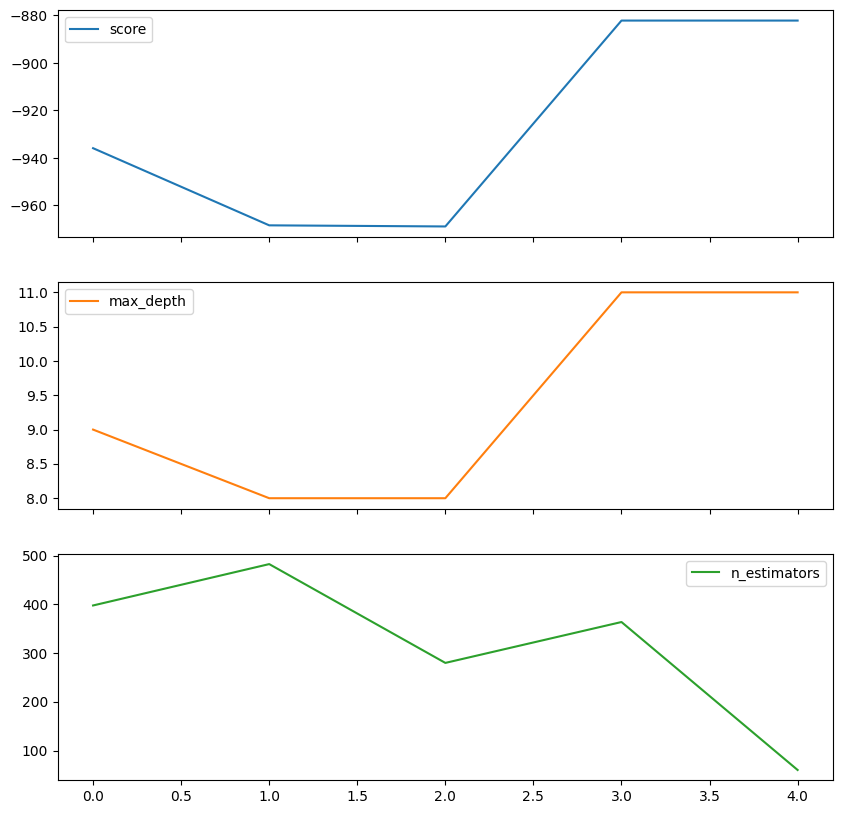

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
best_params['random_state'] = 42
best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
best_model = RandomForestRegressor(**best_params)

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

1 번째 Stratified K-Fold RMSE: 892.6291758076986
2 번째 Stratified K-Fold RMSE: 863.6937000738636
3 번째 Stratified K-Fold RMSE: 852.7673030397949
4 번째 Stratified K-Fold RMSE: 917.6659767691796
5 번째 Stratified K-Fold RMSE: 867.3474581427878
--------------------------------------------------
교차 검증 RMSE: 878.820722766665


# train_y, pred RMSE

In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
pred = model.predict(train_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))
print(f'RMSE: {rmse}')

RMSE: 817.3852516243489


In [ ]:
pred_df = pd.DataFrame(pred, columns=['price(원/kg)'])

,price(원/kg)
0,80.363358
1,113.604691
2,1496.623169
3,1415.812744
4,1363.504883
...,...
47513,488.169769
47514,392.375732
47515,583.965149
47516,503.691956


# 학습 평가

## 산포도

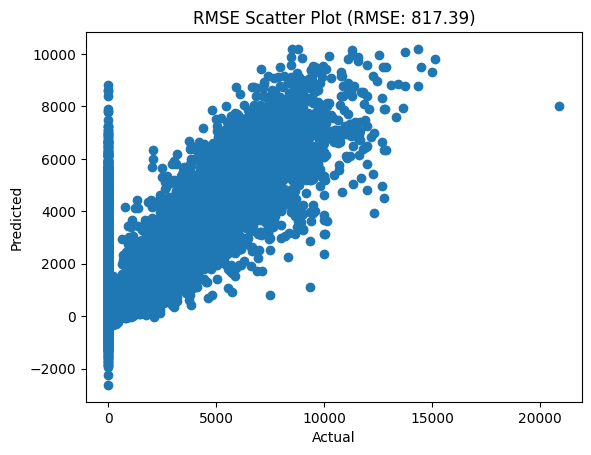

In [ ]:
import matplotlib.pyplot as plt

# train_y와 pred의 RMSE를 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))

# 산포도 그래프 생성
plt.scatter(train_y, pred)

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'RMSE Scatter Plot (RMSE: {rmse:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 그래프 표시
plt.show()

## 예측 오차 히스토그램

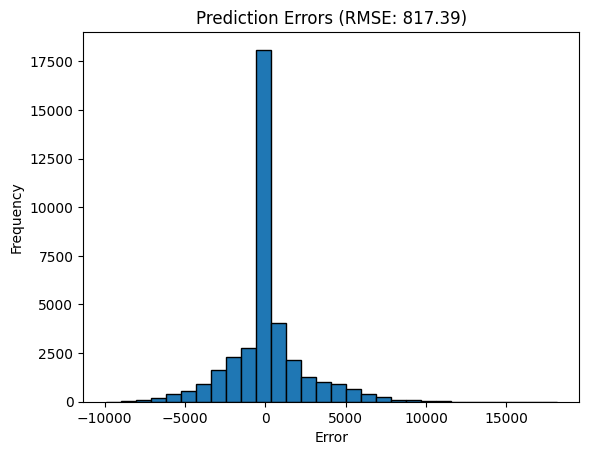

In [ ]:
# 예측 오차 계산
errors = train_y - pred_df

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))

# 히스토그램 생성
plt.hist(errors, bins=30, edgecolor='k')

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'Prediction Errors (RMSE: {rmse:.2f})')
plt.xlabel('Error')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

## 오차의 절대값 히스토그램

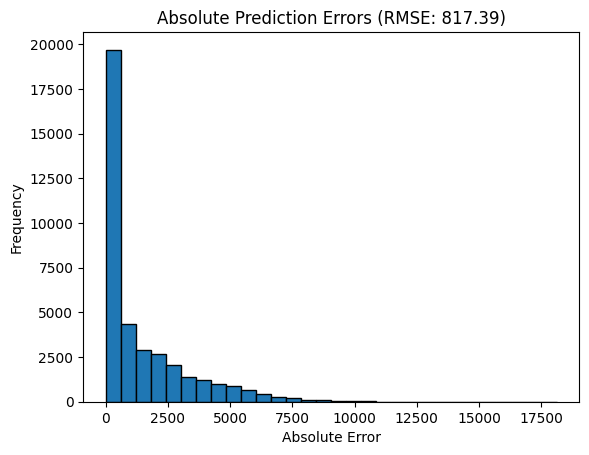

In [ ]:
# 예측 오차 계산 (절대값)
errors = np.abs(train_y - pred_df)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))

# 히스토그램 생성
plt.hist(errors, bins=30, edgecolor='k')

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'Absolute Prediction Errors (RMSE: {rmse:.2f})')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

## 상위 오차 샘플 확인

In [ ]:
# 예측 오차 계산
errors = np.abs(train_y['price(원/kg)'] - pred)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_y, pred_df))

# 오차와 해당 오차가 속한 샘플의 인덱스를 결합하여 튜플로 만듭니다
error_samples = list(zip(errors, range(len(errors))))

# 오차를 기준으로 정렬합니다 (내림차순)
error_samples.sort(reverse=True, key=lambda x: x[0])

# 상위 N개의 오차 샘플을 확인합니다 (여기서는 상위 10개로 예시)
top_N = 10
top_errors = error_samples[:top_N]



# 결과 출력
for error, sample_idx in top_errors:
    true_value = float(train_y.iloc[sample_idx])
    predicted_value = float(pred[sample_idx])
    print(f'Sample Index: {sample_idx}, Error: {error}, True Value: {true_value:.2f}, Predicted Value: {predicted_value:.2f}')


Sample Index: 5848, Error: 12904.8623046875, True Value: 20909.00, Predicted Value: 8004.14
Sample Index: 5264, Error: 8798.642578125, True Value: 0.00, Predicted Value: 8798.64
Sample Index: 5558, Error: 8622.3212890625, True Value: 0.00, Predicted Value: 8622.32
Sample Index: 5576, Error: 8576.9091796875, True Value: 0.00, Predicted Value: 8576.91
Sample Index: 11031, Error: 8390.90283203125, True Value: 12333.00, Predicted Value: 3942.10
Sample Index: 4976, Error: 8382.94140625, True Value: 0.00, Predicted Value: 8382.94
Sample Index: 4966, Error: 8258.77734375, True Value: 12763.00, Predicted Value: 4504.22
Sample Index: 10716, Error: 8211.533203125, True Value: 9333.00, Predicted Value: 1121.47
Sample Index: 6480, Error: 7909.0966796875, True Value: 0.00, Predicted Value: 7909.10
Sample Index: 5584, Error: 7815.18896484375, True Value: 0.00, Predicted Value: 7815.19


## Residual Plot

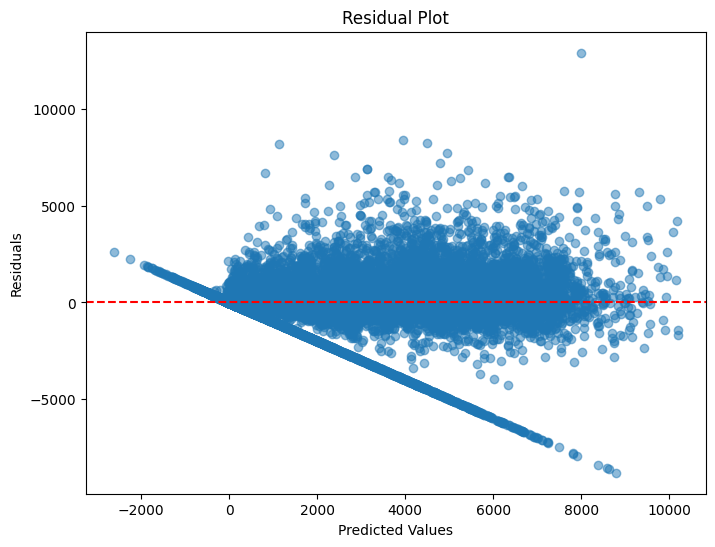

In [ ]:
# 예측값과 실제값의 차이 (잔차) 계산
residuals = train_y['price(원/kg)'] - pred

# Residual Plot 그리기
plt.figure(figsize=(8, 6))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Submission

In [ ]:
#submission = pd.read_csv('/content/drive/MyDrive/dev/ML_basic/sample_submission.csv')
submission = pd.read_csv('sample_submission.csv')
submission

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [ ]:
target_pred = model.predict(test_encoded)

NotFittedError: ignored

In [ ]:
submission['answer'] = target_pred
submission

,ID,answer
0,TG_A_J_20230304,3579.645996
1,TG_A_J_20230305,364.044647
2,TG_A_J_20230306,3652.831055
3,TG_A_J_20230307,3629.557861
4,TG_A_J_20230308,3715.735840
...,...,...
1087,RD_F_J_20230327,665.800659
1088,RD_F_J_20230328,570.006348
1089,RD_F_J_20230329,585.951965
1090,RD_F_J_20230330,707.286621


In [ ]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
submission['year'] = submission['ID'].apply(lambda x : int(x[-8:-4]))
submission['month'] = submission['ID'].apply(lambda x : int(x[-4:-2]))
submission['day'] = submission['ID'].apply(lambda x : int(x[-2:]))

In [ ]:
submission

,ID,answer,year,month,day
0,TG_A_J_20230304,3579.645996,2023,3,4
1,TG_A_J_20230305,364.044647,2023,3,5
2,TG_A_J_20230306,3652.831055,2023,3,6
3,TG_A_J_20230307,3629.557861,2023,3,7
4,TG_A_J_20230308,3715.735840,2023,3,8
...,...,...,...,...,...
1087,RD_F_J_20230327,665.800659,2023,3,27
1088,RD_F_J_20230328,570.006348,2023,3,28
1089,RD_F_J_20230329,585.951965,2023,3,29
1090,RD_F_J_20230330,707.286621,2023,3,30


In [ ]:
submission = change_answer(submission)

In [ ]:
submission

,ID,answer,year,month,day
0,TG_A_J_20230304,3579.645996,2023,3,4
1,TG_A_J_20230305,0.000000,2023,3,5
2,TG_A_J_20230306,3652.831055,2023,3,6
3,TG_A_J_20230307,3629.557861,2023,3,7
4,TG_A_J_20230308,3715.735840,2023,3,8
...,...,...,...,...,...
1087,RD_F_J_20230327,665.800659,2023,3,27
1088,RD_F_J_20230328,570.006348,2023,3,28
1089,RD_F_J_20230329,585.951965,2023,3,29
1090,RD_F_J_20230330,707.286621,2023,3,30


In [ ]:
submission.drop(columns=['year', 'month', 'day'],inplace=True)

In [ ]:
submission

,ID,answer
0,TG_A_J_20230304,3579.645996
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3652.831055
3,TG_A_J_20230307,3629.557861
4,TG_A_J_20230308,3715.735840
...,...,...
1087,RD_F_J_20230327,665.800659
1088,RD_F_J_20230328,570.006348
1089,RD_F_J_20230329,585.951965
1090,RD_F_J_20230330,707.286621


In [ ]:
submission.to_csv('./Hyul.csv', index=False)

# autogluon : TimeSeriesDataFrame

### model 1

In [ ]:
train_df = pd.read_csv('train.csv')[['ID','timestamp','supply(kg)', 'price(원/kg)']]
# test_df = pd.read_csv('test.csv')[['ID','timestamp']]

In [ ]:
train_df['item_id'] = train_df.ID.str[0:6]
# test_df['item_id'] = test_df.ID.str[0:6]

In [ ]:
data = TimeSeriesDataFrame(train_df.drop(columns=['ID']))
predictor = TimeSeriesPredictor(
    prediction_length=28,
    target="price(원/kg)",
    eval_metric="RMSE",
)
# seed 고정
predictor.fit( data, random_seed=42, )

No path specified. Models will be saved in: "AutogluonModels/ag-20231114_080852/"
================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'num_val_windows': 1,
 'prediction_length': 28,
 'random_seed': 42,
 'target': 'price(원/kg)',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 59397 rows, 39 items (item = single time series). Average time series length is 1523.0. Data frequency is 'D'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to AutogluonModels/ag-20231114_080852/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains foll

In [ ]:
predictor.refit_full()

Refitting models via `refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix '_FULL' and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `fit` call.
Fitting model: Naive_FULL | Skipping fit via cloning parent ...
Fitting model: SeasonalNaive_FULL | Skipping fit via cloning parent ...
Fitting model: Theta_FULL | Skipping fit via cloning parent ...
Fitting model: AutoETS_FULL | Skipping fit via cloning parent ...
Fitting model: RecursiveTabular_FULL
	6.75    s     = Training runtime
Fitting model: DeepAR_FULL | Skipping fit via cloning parent ...
Fitting model: WeightedEnsemble_FULL | Skipping fit via cloning parent ...
Refit complete. Models trained: ['Naive_FULL', 'SeasonalNaive_FULL', 'Theta_FULL', 'AutoETS_FULL', 'RecursiveTabular_FULL', 'DeepAR_FULL', 'WeightedEnsemble_FULL']
Total runtime: 6.83 s
Updated best model to 'WeightedEnsemble_FULL' (Previously 'W

{'Naive': 'Naive_FULL',
 'SeasonalNaive': 'SeasonalNaive_FULL',
 'Theta': 'Theta_FULL',
 'AutoETS': 'AutoETS_FULL',
 'RecursiveTabular': 'RecursiveTabular_FULL',
 'DeepAR': 'DeepAR_FULL',
 'WeightedEnsemble': 'WeightedEnsemble_FULL'}

In [ ]:
# seed 고정
pred = predictor.predict(data, random_seed=42, )

INFO:lightning_fabric.utilities.seed:Global seed set to 42
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble_FULL


In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['answer'] = pred.reset_index()['mean']
submission.loc[ submission['answer'] < 0.0, 'answer'] = 0.0

In [ ]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
submission['year'] = submission['ID'].apply(lambda x : int(x[-8:-4]))
submission['month'] = submission['ID'].apply(lambda x : int(x[-4:-2]))
submission['day'] = submission['ID'].apply(lambda x : int(x[-2:]))

submission = change_answer(submission)
submission.drop(columns=['year', 'month', 'day'],inplace=True)

In [ ]:
submission.to_csv('./TimeSeries_submission.csv', index=False)

# autogluon : TabularDataset

### model 1

In [ ]:
from autogluon.core.metrics import get_metric

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# autogluon 학습을 위한 데이터 형태로 변환
train = TabularDataset(train_df.drop(['ID','supply(kg)'], axis=1))
test = TabularDataset(test_df.drop(['ID'], axis=1))

In [ ]:
# 이렇게 한 줄만 작성하면 내부에서 알아서 학습해줍니다.
predictor = TabularPredictor(label='price(원/kg)', eval_metric='rmse',).fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231114_074748/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231114_074748/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   48.46 GB / 83.96 GB (57.7%)
Train Data Rows:    59397
Train Data Columns: 4
Label Column: price(원/kg)
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (20909.0, 0.0, 1131.68067, 2029.94145)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator

[1000]	valid_set's rmse: 1096.63
[2000]	valid_set's rmse: 1089.03
[3000]	valid_set's rmse: 1087.3
[4000]	valid_set's rmse: 1084.89
[5000]	valid_set's rmse: 1083.03
[6000]	valid_set's rmse: 1081.1
[7000]	valid_set's rmse: 1080.04
[8000]	valid_set's rmse: 1079.3
[9000]	valid_set's rmse: 1078.08
[10000]	valid_set's rmse: 1077.65


	-1077.437	 = Validation score   (-root_mean_squared_error)
	39.67s	 = Training   runtime
	2.49s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 874.673
[2000]	valid_set's rmse: 867.335
[3000]	valid_set's rmse: 861.375


	-860.836	 = Validation score   (-root_mean_squared_error)
	12.51s	 = Training   runtime
	0.78s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-883.906	 = Validation score   (-root_mean_squared_error)
	38.21s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	-895.9913	 = Validation score   (-root_mean_squared_error)
	396.84s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-871.814	 = Validation score   (-root_mean_squared_error)
	16.22s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-911.2984	 = Validation score   (-root_mean_squared_error)
	67.59s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	-881.8729	 = Validation score   (-root_mean_squared_error)
	7.49s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-939.2725	 = Validation score   (-root_mean_squared_error)
	173.11s	 = Training   runtime
	0.02s	

In [ ]:
# 각각의 모델의 훈련 성능을 평가할 수 있음
ld_board = predictor.leaderboard(train, silent=True)
ld_board

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE,-355.642927,-871.814035,2.430297,0.199344,16.222675,2.430297,0.199344,16.222675,1,True,7
1,RandomForestMSE,-360.397474,-883.905970,2.741468,0.213528,38.206458,2.741468,0.213528,38.206458,1,True,5
2,WeightedEnsemble_L2,-553.811889,-839.965765,23.084354,1.472200,315.567635,0.008241,0.000889,0.383711,2,True,12
3,LightGBMLarge,-600.228561,-871.887991,4.079206,0.228360,4.506940,4.079206,0.228360,4.506940,1,True,11
4,LightGBM,-625.640858,-860.835999,13.915832,0.781426,12.505776,13.915832,0.781426,12.505776,1,True,4
5,XGBoost,-708.662955,-881.872915,2.218316,0.174667,7.489367,2.218316,0.174667,7.489367,1,True,9
6,CatBoost,-760.696381,-895.991283,2.080434,0.139048,396.838354,2.080434,0.139048,396.838354,1,True,6
7,LightGBMXT,-804.817724,-1077.436977,67.535082,2.486681,39.665222,67.535082,2.486681,39.665222,1,True,3
8,NeuralNetTorch,-868.839570,-939.272543,0.215532,0.023320,173.108008,0.215532,0.023320,173.108008,1,True,10
9,NeuralNetFastAI,-875.934269,-911.298444,1.353752,0.049283,67.589612,1.353752,0.049283,67.589612,1,True,8


In [ ]:
# 예측하기
pred_y = predictor.predict(test)

In [ ]:
# 제출 파일 생성
submission = pd.DataFrame()

submission['ID'] = test_df['ID']
submission['answer'] = pred_y

In [ ]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
submission['year'] = submission['ID'].apply(lambda x : int(x[-8:-4]))
submission['month'] = submission['ID'].apply(lambda x : int(x[-4:-2]))
submission['day'] = submission['ID'].apply(lambda x : int(x[-2:]))

submission = change_answer(submission)
submission.drop(columns=['year', 'month', 'day'],inplace=True)

In [ ]:
submission.to_csv('Tabular_submission.csv', index=False)